In [1]:
!pip3 install --upgrade pip
!pip3 install pandas
!pip3 install ipython-sql prettytable 
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install numpy
!pip3 install scipy
!pip3 install scikit-learn

!pip3 install ipython-sql


import prettytable

prettytable.DEFAULT = 'DEFAULT'

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

con = sqlite3.connect('data.db')

cursor = con.cursor()




In [3]:
# import chicago socioeconomic census data 
chicago_census_data = pd.read_csv ('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01')
chicago_census_data.to_sql("CHICAGO_CENSUS_DATA", con, if_exists='replace', index=False, method="multi")


78

In [4]:
#chicago public school data
chicago_public_schools = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01')
chicago_public_schools.to_sql("CHICAGO_PUBLIC_SCHOOLS_DATA", con, if_exists='replace', index=False)


566

In [5]:
# chicago crime data
chicago_crime_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCrimeData.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01')
chicago_crime_data.to_sql("CHICAGO_CRIME_DATA", con, if_exists='replace', index=False)



533

In [6]:
# loading sql magic module to use % commands
%load_ext sql

# creating a connection between sql magic and 'FinalDB.db' database
%sql sqlite:///data.db

## **Correlation between per_capita_income and hardship**

Correlation between Income and Hardship Index: -0.849


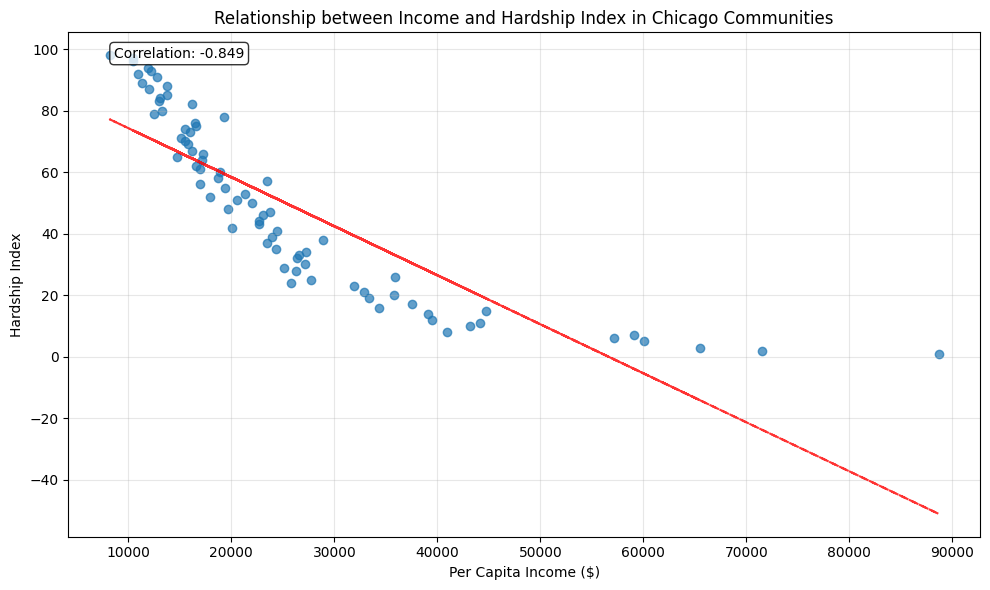


Full Correlation Matrix:
                                              PERCENT_OF_HOUSING_CROWDED  \
PERCENT_OF_HOUSING_CROWDED                                         1.000   
PERCENT_HOUSEHOLDS_BELOW_POVERTY                                   0.319   
PERCENT_AGED_16__UNEMPLOYED                                        0.165   
PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA                       0.876   
PERCENT_AGED_UNDER_18_OR_OVER_64                                   0.225   
PER_CAPITA_INCOME                                                 -0.542   
HARDSHIP_INDEX                                                     0.650   

                                              PERCENT_HOUSEHOLDS_BELOW_POVERTY  \
PERCENT_OF_HOUSING_CROWDED                                               0.319   
PERCENT_HOUSEHOLDS_BELOW_POVERTY                                         1.000   
PERCENT_AGED_16__UNEMPLOYED                                              0.800   
PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_

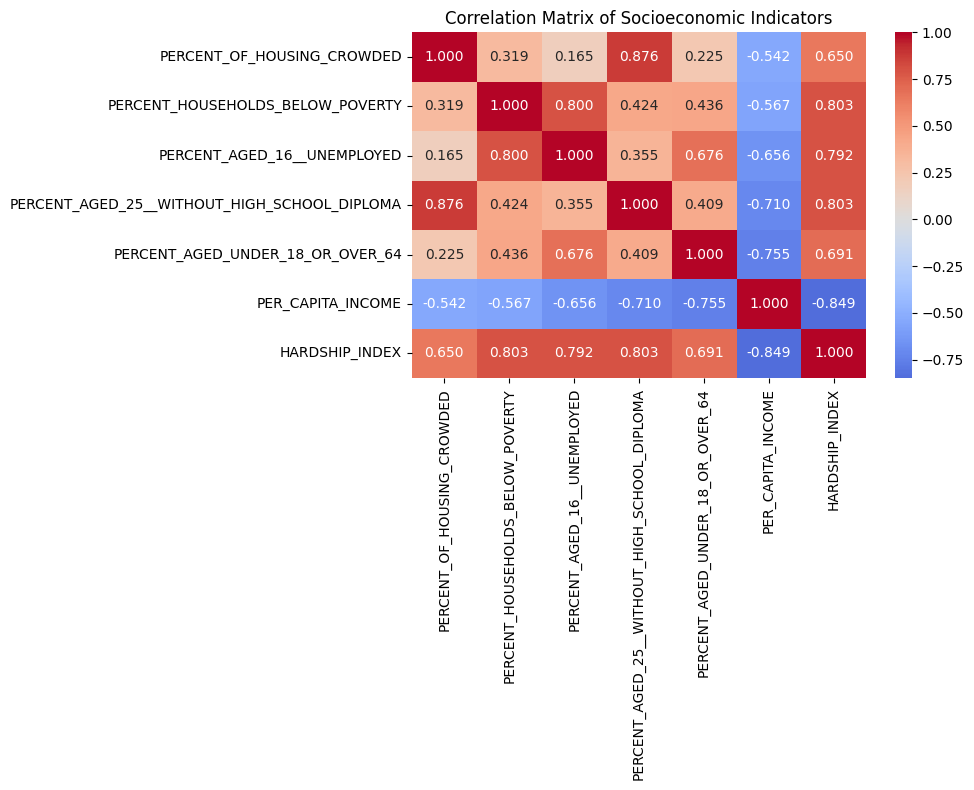

In [7]:

#connecting to database and load data
conn = sqlite3.connect('FinalDB.db')
df = pd.read_sql_query("SELECT * FROM Chicago_Census_Data WHERE COMMUNITY_AREA_NAME != 'CHICAGO'", conn)
conn.close()

#correlation caluculation
correlation = df['PER_CAPITA_INCOME'].corr(df['HARDSHIP_INDEX'])
print(f"Correlation between Income and Hardship Index: {correlation:.3f}")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['PER_CAPITA_INCOME'], df['HARDSHIP_INDEX'], alpha=0.7)
plt.title('Relationship between Income and Hardship Index in Chicago Communities')
plt.xlabel('Per Capita Income ($)')
plt.ylabel('Hardship Index')

# Trend line
z = np.polyfit(df['PER_CAPITA_INCOME'], df['HARDSHIP_INDEX'], 1)
p = np.poly1d(z)
plt.plot(df['PER_CAPITA_INCOME'], p(df['PER_CAPITA_INCOME']), "r--", alpha=0.8)

# Correlation text
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# checking correlations with other variables
numeric_cols = ['PERCENT_OF_HOUSING_CROWDED', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY',
                'PERCENT_AGED_16__UNEMPLOYED', 'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA',
                'PERCENT_AGED_UNDER_18_OR_OVER_64', 'PER_CAPITA_INCOME', 'HARDSHIP_INDEX']

correlation_matrix = df[numeric_cols].corr()
print("\nFull Correlation Matrix:")
print(correlation_matrix.round(3))

# Correlation Heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Correlation Matrix of Socioeconomic Indicators')
plt.tight_layout()
plt.show()

# **Chicago Census Data Analysis & Visualization**

### Python, Matplotlib, Pandas, Seaborn, SKlearn

Dataset Shape: (78, 9)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   COMMUNITY_AREA_NUMBER                         77 non-null     float64
 1   COMMUNITY_AREA_NAME                           78 non-null     object 
 2   PERCENT_OF_HOUSING_CROWDED                    78 non-null     float64
 3   PERCENT_HOUSEHOLDS_BELOW_POVERTY              78 non-null     float64
 4   PERCENT_AGED_16__UNEMPLOYED                   78 non-null     float64
 5   PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA  78 non-null     float64
 6   PERCENT_AGED_UNDER_18_OR_OVER_64              78 non-null     float64
 7   PER_CAPITA_INCOME                             78 non-null     int64  
 8   HARDSHIP_INDEX                                77 non-null     float64
dtypes: float64(7), int64(1),

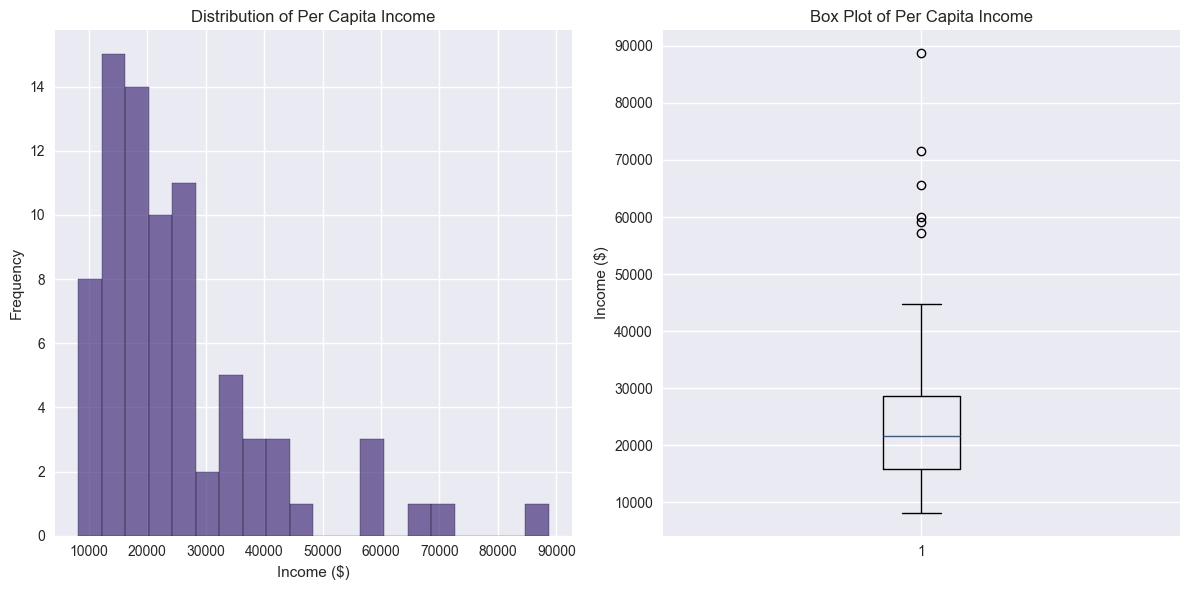

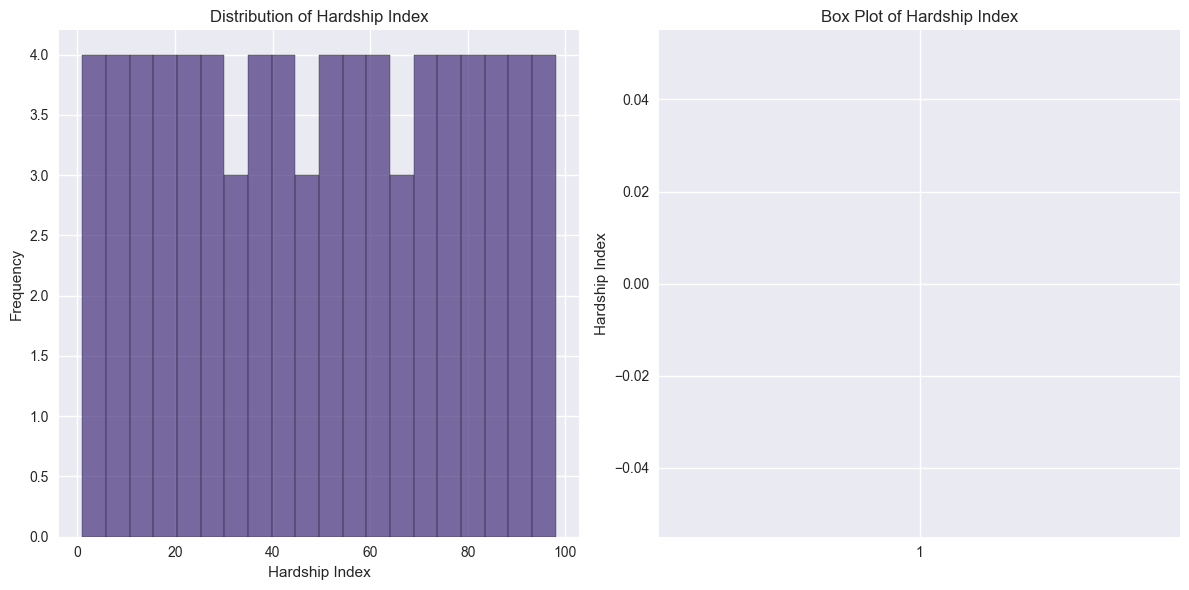

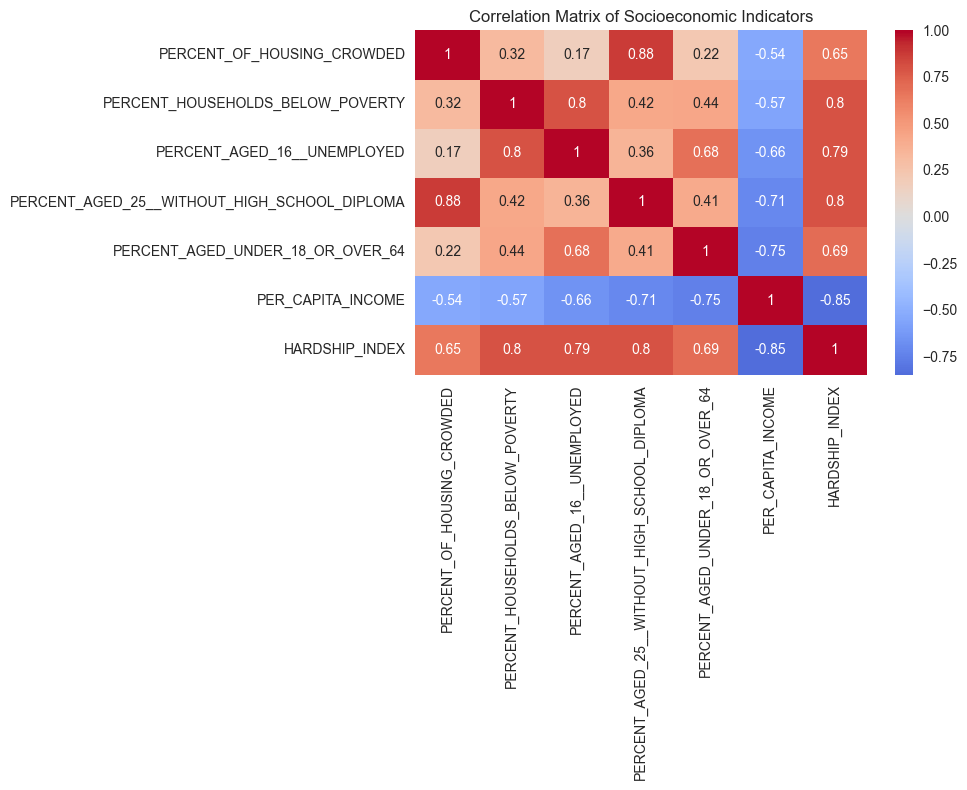

Correlation between Income and Hardship Index: -0.849


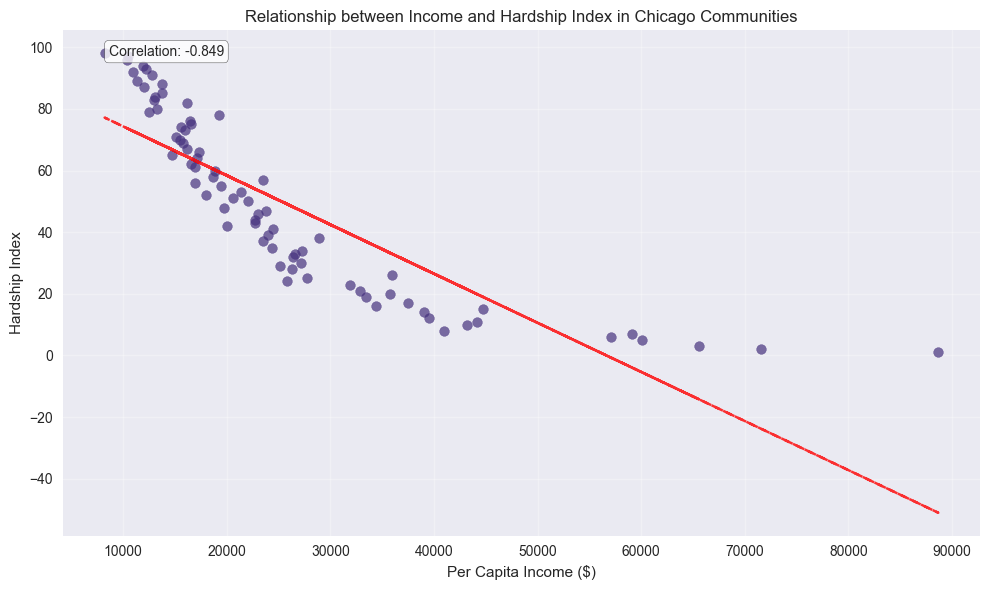

<Figure size 800x550 with 0 Axes>

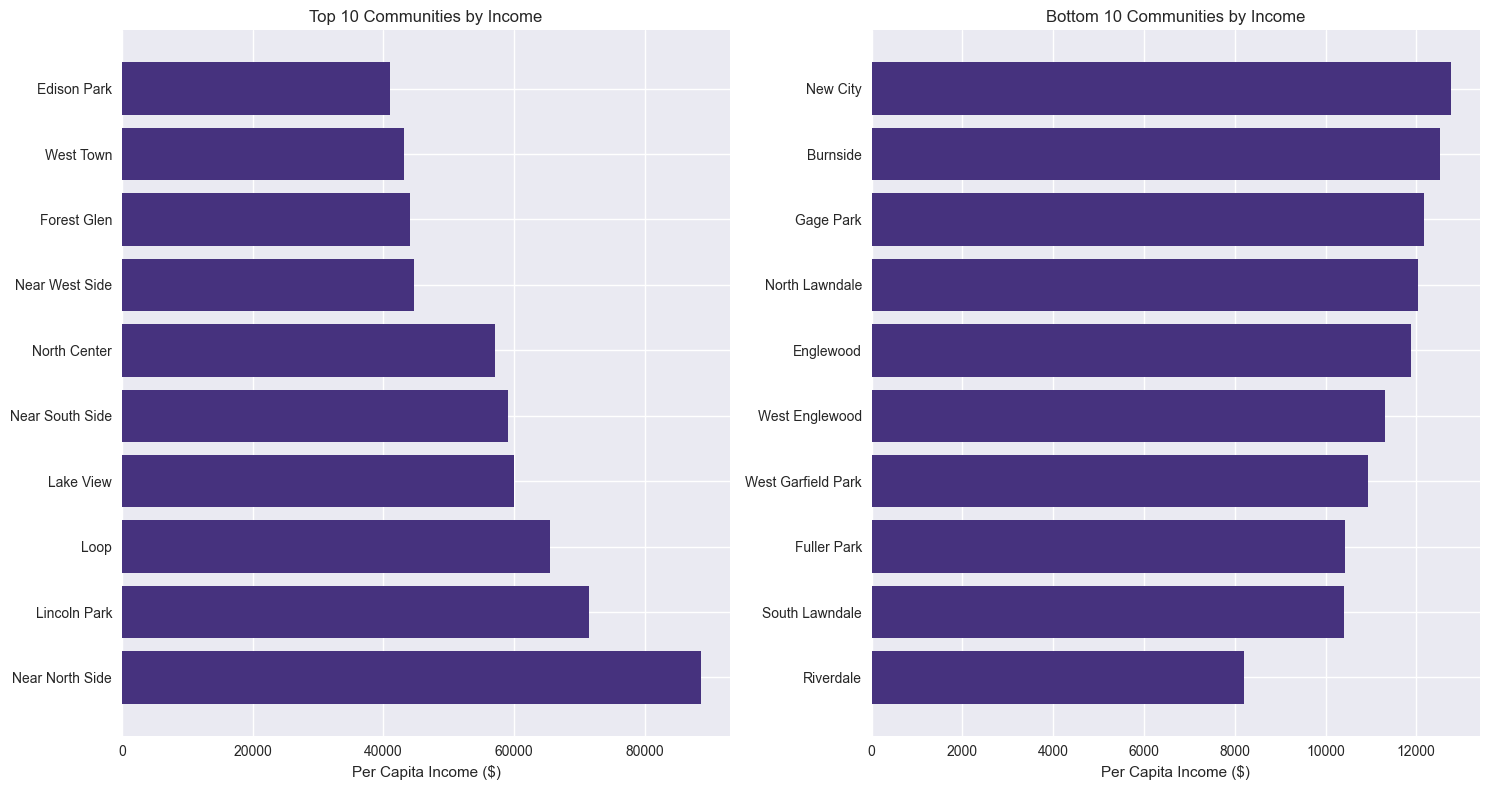

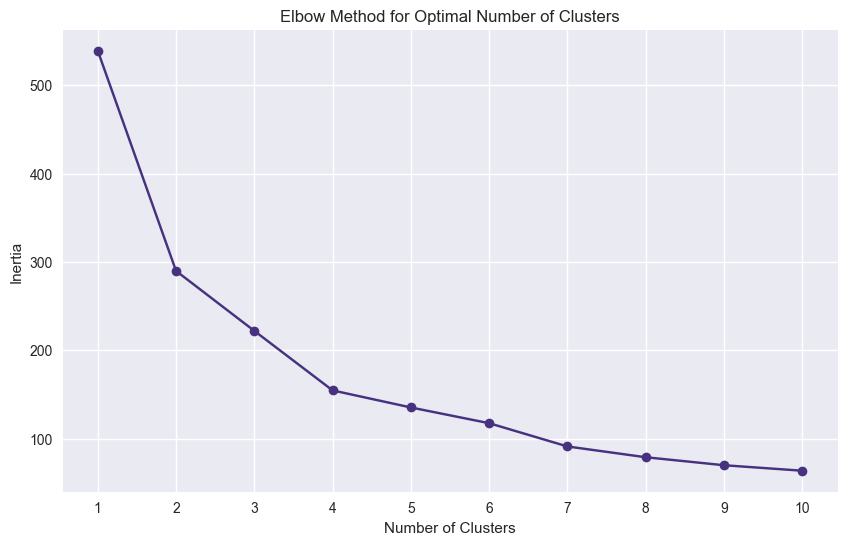

ValueError: Length of values (77) does not match length of index (78)

In [8]:
# Set up visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")


chicago_census_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01')




# data exploration
print("Dataset Shape:", chicago_census_data.shape)
print("\nColumn Information:")
print(chicago_census_data.info())
print("\nBasic Statistics:")
print(chicago_census_data.describe())
print("\nMissing Values:")
print(chicago_census_data.isnull().sum())

# income distribution analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(chicago_census_data['PER_CAPITA_INCOME'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Per Capita Income')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(chicago_census_data['PER_CAPITA_INCOME'])
plt.title('Box Plot of Per Capita Income')
plt.ylabel('Income ($)')
plt.tight_layout()
plt.show()

# hardship index distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(chicago_census_data['HARDSHIP_INDEX'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Hardship Index')
plt.xlabel('Hardship Index')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(chicago_census_data['HARDSHIP_INDEX'])
plt.title('Box Plot of Hardship Index')
plt.ylabel('Hardship Index')
plt.tight_layout()
plt.show()

# Correlation matrix
numeric_cols = ['PERCENT_OF_HOUSING_CROWDED', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY', 
                'PERCENT_AGED_16__UNEMPLOYED', 'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA',
                'PERCENT_AGED_UNDER_18_OR_OVER_64', 'PER_CAPITA_INCOME', 'HARDSHIP_INDEX']

correlation_matrix = chicago_census_data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Socioeconomic Indicators')
plt.tight_layout()
plt.show()


# scatter plot (income vs Hardship)

#correlation
correlation = df['PER_CAPITA_INCOME'].corr(df['HARDSHIP_INDEX'])
print(f"Correlation between Income and Hardship Index: {correlation:.3f}")

# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['PER_CAPITA_INCOME'], df['HARDSHIP_INDEX'], alpha=0.7)
plt.title('Relationship between Income and Hardship Index in Chicago Communities')
plt.xlabel('Per Capita Income ($)')
plt.ylabel('Hardship Index')

# trend line
z = np.polyfit(df['PER_CAPITA_INCOME'], df['HARDSHIP_INDEX'], 1)
p = np.poly1d(z)
plt.plot(df['PER_CAPITA_INCOME'], p(df['PER_CAPITA_INCOME']), "r--", alpha=0.8)

# correlation text
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



#/////////






plt.tight_layout()
plt.show()

# top 10 and bottom 10 communities by income
top_10_income = chicago_census_data.nlargest(10, 'PER_CAPITA_INCOME')
bottom_10_income = chicago_census_data.nsmallest(10, 'PER_CAPITA_INCOME')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.barh(top_10_income['COMMUNITY_AREA_NAME'], top_10_income['PER_CAPITA_INCOME'])
ax1.set_title('Top 10 Communities by Income')
ax1.set_xlabel('Per Capita Income ($)')

ax2.barh(bottom_10_income['COMMUNITY_AREA_NAME'], bottom_10_income['PER_CAPITA_INCOME'])
ax2.set_title('Bottom 10 Communities by Income')
ax2.set_xlabel('Per Capita Income ($)')

plt.tight_layout()
plt.show()

# 7. cluster analysis based on socioeconomic factors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# prepare data for clustering
X = chicago_census_data[numeric_cols].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

# apply K-means clustering ????? ERROR
kmeans = KMeans(n_clusters=3, random_state=42)
chicago_census_data['Cluster'] = kmeans.fit_predict(X_scaled)

# visualize clusters in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=chicago_census_data['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Cluster Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

# analyze cluster characteristics
cluster_summary = chicago_census_data.groupby('Cluster')[numeric_cols].mean()
print("Cluster Summary Statistics:")
print(cluster_summary)

# geographic distribution of clusters (if we had coordinates, we'd create a map)
# For now, let's just see which communities fall into which clusters
for cluster in sorted(chicago_census_data['Cluster'].unique()):
    print(f"\nCluster {cluster} Communities:")
    print(chicago_census_data[chicago_census_data['Cluster'] == cluster]['COMMUNITY_AREA_NAME'].tolist())

# statistical tests between clusters
# For example, test if income differs significantly between clusters
cluster_0_income = chicago_census_data[chicago_census_data['Cluster'] == 0]['PER_CAPITA_INCOME']
cluster_1_income = chicago_census_data[chicago_census_data['Cluster'] == 1]['PER_CAPITA_INCOME']
cluster_2_income = chicago_census_data[chicago_census_data['Cluster'] == 2]['PER_CAPITA_INCOME']

# ANOVA test
f_stat, p_value = stats.f_oneway(cluster_0_income, cluster_1_income, cluster_2_income)
print(f"\nANOVA test for income differences between clusters: F={f_stat:.2f}, p={p_value:.4f}")

# If p-value is significant, perform post-hoc tests
if p_value < 0.05:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(endog=df['PER_CAPITA_INCOME'], groups=chicago_census_data['Cluster'], alpha=0.05)
    print(tukey)